In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import plotly.express as px

# Informacion Municipal

## Cargar datos independientes

In [2]:
datos_mun = pd.read_csv('..\Datos\Procesados\Independientes.csv')

In [3]:
datos_mun_2018 = datos_mun[datos_mun['Año Censal'] == 2018]

In [4]:
for col in datos_mun_2018.columns:
  print(col)

Año Censal
Entidad
Municipio
Edad mediana
Grado promedio de escolaridad de la población de 15 y más años
Hogares censales
Población de 5 años y más que asiste a la escuela
Población derechohabiente a servicios de salud
Población en hogares censales
Población en hogares familiares
Población en hogares no familiares
Población total
Porcentaje de población de 15 a 29 años
Porcentaje de población de 60 y más años
Promedio de ocupantes en viviendas particulares habitadas
Tamaño promedio de los hogares censales
Total de viviendas particulares habitadas
Viviendas particulares habitadas
Viviendas particulares habitadas que disponen de agua de la red pública en el ámbito de la vivienda
Viviendas particulares habitadas que disponen de computadora
Viviendas particulares habitadas que disponen de drenaje
Viviendas particulares habitadas que disponen de energía eléctrica
Viviendas particulares habitadas que disponen de excusado o sanitario
Viviendas particulares habitadas que disponen de lavadora
U

## Preparar Datos Para Agrupar 

### Establecer Datos Importantes

In [5]:
indicadores = [
  'Viviendas particulares habitadas que disponen de agua de la red pública en el ámbito de la vivienda',
  'Viviendas particulares habitadas que disponen de drenaje',
  'Población total',
  'M000A Total de ingresos por suministro de bienes y servicios (millones de pesos)',
  'UE Sector 62 Servicios de salud y de asistencia social',
  'UE Unidades económicas',
  'Prod_Bruta_Per_Capita'
]

In [6]:
datos_cluster = datos_mun_2018[['Entidad', 'Municipio'] + indicadores].dropna()

In [7]:
datos_cluster

,Entidad,Municipio,Viviendas particulares habitadas que disponen de agua de la red pública en el ámbito de la vivienda,Viviendas particulares habitadas que disponen de drenaje,Población total,M000A Total de ingresos por suministro de bienes y servicios (millones de pesos),UE Sector 62 Servicios de salud y de asistencia social,UE Unidades económicas,Prod_Bruta_Per_Capita
3,aguascalientes,aguascalientes,251688.6,252047.0,918594.0,58949.608,2464.0,15339,19854.792215
7,aguascalientes,asientos,11841.2,11474.4,50327.2,434.707,20.0,382,1971.279944
10,aguascalientes,calvillo,14783.2,14849.4,57427.2,1350.533,86.0,920,6842.576340
14,aguascalientes,cosio,3797.0,3774.8,16608.4,257.221,10.0,163,5069.422702
18,aguascalientes,el llano,4881.4,4758.0,20448.0,225.153,7.0,165,2702.415884
...,...,...,...,...,...,...,...,...,...
7412,zacatecas,villa gonzalez ortega,3265.2,3206.2,13145.0,165.224,13.0,242,2735.032332
7415,zacatecas,villa hidalgo,4671.4,4390.4,19254.8,167.774,17.0,182,2192.128716
7419,zacatecas,villa de cos,8738.8,8204.0,34564.0,461.894,31.0,479,3507.059368
7423,zacatecas,villanueva,8604.0,8348.6,31125.4,588.989,35.0,597,4265.294583


In [8]:
dfs_by_entidad = {}
for entidad in datos_cluster['Entidad'].unique():
  dfs_by_entidad[entidad] = datos_cluster[datos_cluster['Entidad'] == entidad].copy()

In [9]:
keys = ['año', 'Entidad', 'Municipio']
features = [col for col in datos_cluster.columns if col not in keys]

['Viviendas particulares habitadas que disponen de agua de la red pública en el ámbito de la vivienda', 'Viviendas particulares habitadas que disponen de drenaje', 'Población total', 'M000A Total de ingresos por suministro de bienes y servicios (millones de pesos)', 'UE Sector 62 Servicios de salud y de asistencia social', 'UE Unidades económicas', 'Prod_Bruta_Per_Capita']


### Estandarizar Los Datos

In [10]:
X = datos_cluster[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [11]:
scaled_by_entidad = {}
for entidad, df_entidad in dfs_by_entidad.items():
  X_entidad = df_entidad[features]
  scaler_entidad = StandardScaler()
  X_scaled_entidad = scaler_entidad.fit_transform(X_entidad)
  scaled_by_entidad[entidad] =X_scaled_entidad


# Agrupacion KMEANS


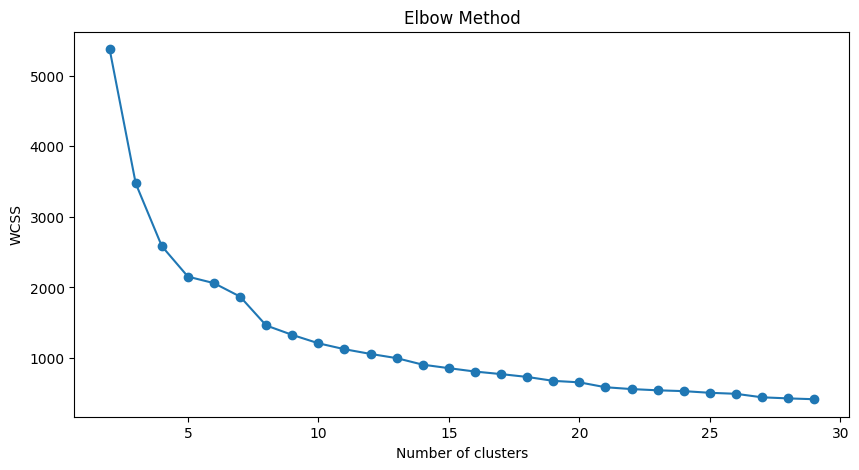

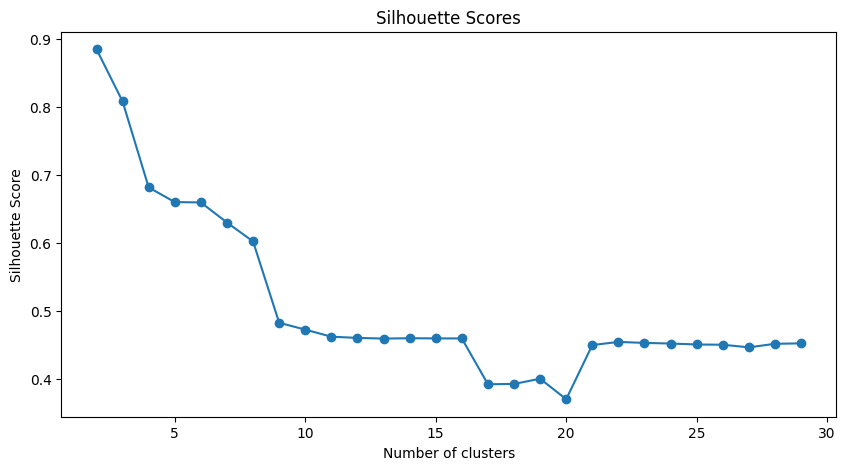

In [26]:
wcss = []
silhouette_scores = []

n = 30

for i in range(2, n):
    kmeans = KMeans(n_clusters=i, random_state=42)
    cluster_labels = kmeans.fit_predict(X_scaled)
    wcss.append(kmeans.inertia_)
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot WCSS (Elbow Method)
plt.figure(figsize=(10, 5))
plt.plot(range(2, n), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Plot Silhouette Scores
plt.figure(figsize=(10, 5))
plt.plot(range(2, n), silhouette_scores, marker='o')
plt.title('Silhouette Scores')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()


In [27]:
kmeans = KMeans(n_clusters=50, random_state=42)
datos_cluster['Cluster'] = kmeans.fit_predict(X_scaled)

In [38]:
score = silhouette_score(X_scaled, datos_cluster['Cluster'])
print(f'Silhouette Score: {score:.3f}')

Silhouette Score: 0.324


In [ ]:
datos_cluster.sort_values(by=['Cluster'])

,Entidad,Municipio,Viviendas particulares habitadas que disponen de agua de la red pública en el ámbito de la vivienda,Viviendas particulares habitadas que disponen de drenaje,Población total,M000A Total de ingresos por suministro de bienes y servicios (millones de pesos),UE Sector 62 Servicios de salud y de asistencia social,UE Unidades económicas,Prod_Bruta_Per_Capita,Cluster
3771,oaxaca,san antonino el alto,657.6,93.2,2665.6,10.895,2.0,47,1107.442977,0
3316,nayarit,huajicori,2140.0,1869.4,12064.0,26.133,4.0,81,745.855438,0
5879,tamaulipas,mier,2617.2,2598.2,6060.4,129.614,4.0,104,3483.598442,0
3339,nayarit,san pedro lagunillas,2344.2,2344.2,7648.4,116.104,3.0,105,3062.339836,0
5854,tamaulipas,gomez farias,2407.4,1688.8,8387.6,65.617,2.0,54,1699.413420,0
...,...,...,...,...,...,...,...,...,...,...
3624,oaxaca,heroica ciudad de huajuapan de leon,17908.4,19010.0,76618.2,4008.942,277.0,2716,17707.515969,48
5905,tamaulipas,rio bravo,36439.2,34641.6,129639.0,6897.692,286.0,2063,18119.007397,48
2543,michoacan de ocampo,sahuayo,20596.2,20695.8,77349.8,4007.816,315.0,2495,17469.469863,48
50,baja california,mexicali,311336.0,301915.0,1027198.8,59248.481,2085.0,10351,18349.614505,49


In [ ]:
datos_cluster[['Entidad', 'Municipio', 'Cluster']]

cluster_summary = datos_cluster.groupby('Cluster')[features].mean()
cluster_summary

,Viviendas particulares habitadas que disponen de agua de la red pública en el ámbito de la vivienda,Viviendas particulares habitadas que disponen de drenaje,Población total,M000A Total de ingresos por suministro de bienes y servicios (millones de pesos),UE Sector 62 Servicios de salud y de asistencia social,UE Unidades económicas,Prod_Bruta_Per_Capita,Cluster
Cluster,,,,,,,,
0,1858.247717,1699.038881,8.213145e+03,52.934999,4.798233,106.944035,1752.909952,0.0
1,192693.800000,193581.750000,6.664522e+05,54709.409500,1345.250000,10232.750000,27247.213837,1.0
2,6265.679070,5931.637209,2.964567e+04,190.139634,14.447674,312.459302,1778.599527,2.0
3,462340.300000,465534.500000,1.739524e+06,72461.622500,2539.000000,37344.000000,13586.659250,3.0
4,25188.206250,25529.856250,1.015117e+05,3590.527625,197.812500,2491.531250,10998.436538,4.0
5,273282.000000,274023.100000,9.442997e+05,71222.479500,2189.000000,12449.500000,23220.195311,5.0
6,61519.150000,63294.875000,2.323818e+05,14023.768250,485.312500,4669.125000,19645.840864,6.0
7,5624.200000,5568.400000,2.342960e+04,856.261000,33.000000,393.000000,107794.712671,7.0
8,102864.533333,104225.133333,3.621362e+05,32418.647667,1282.666667,12466.000000,30512.394729,8.0


## Resultados de Agrupacion

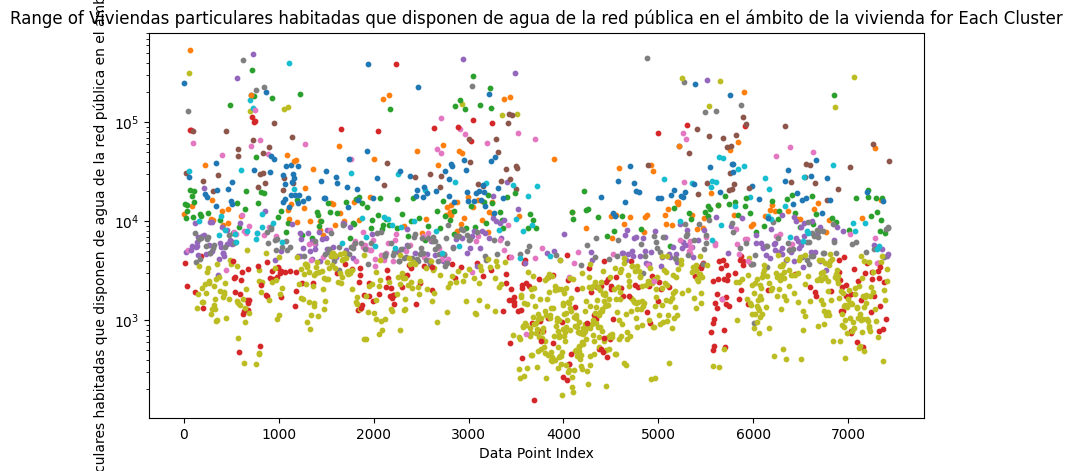

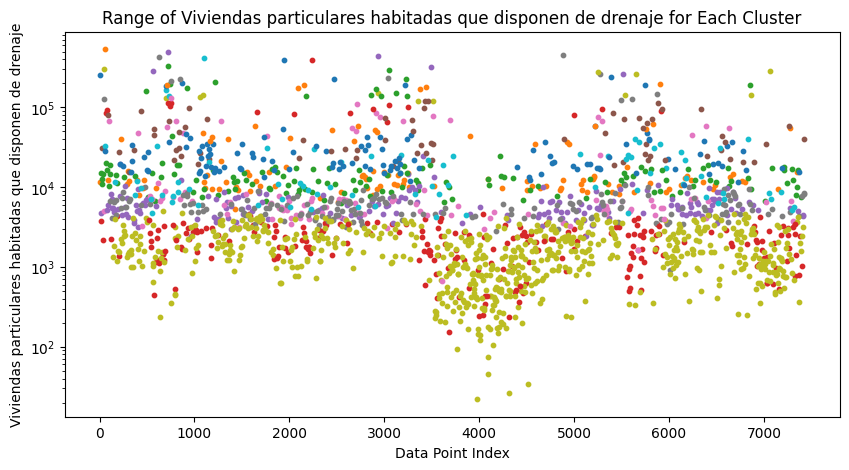

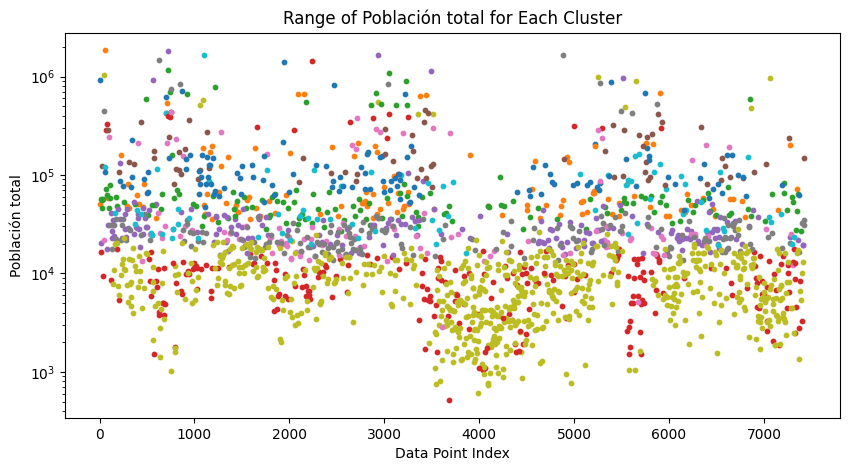

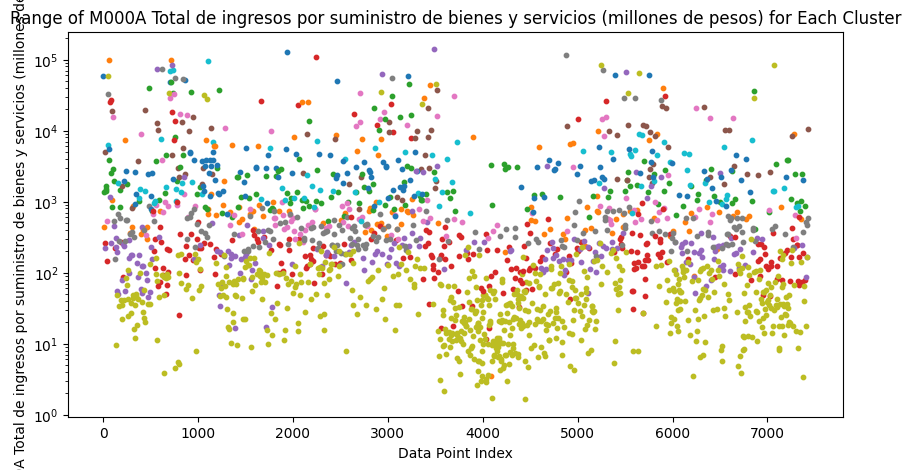

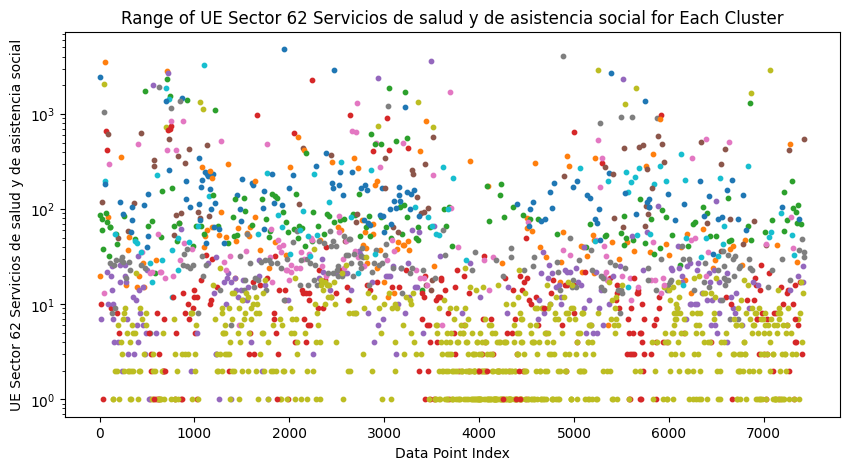

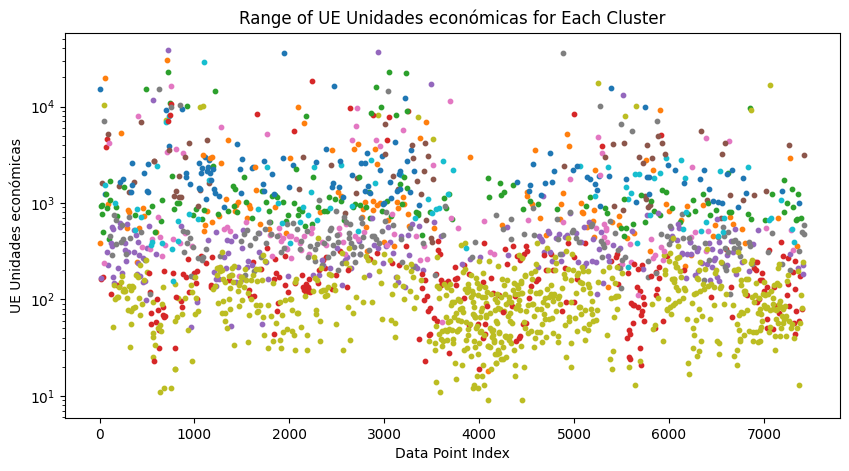

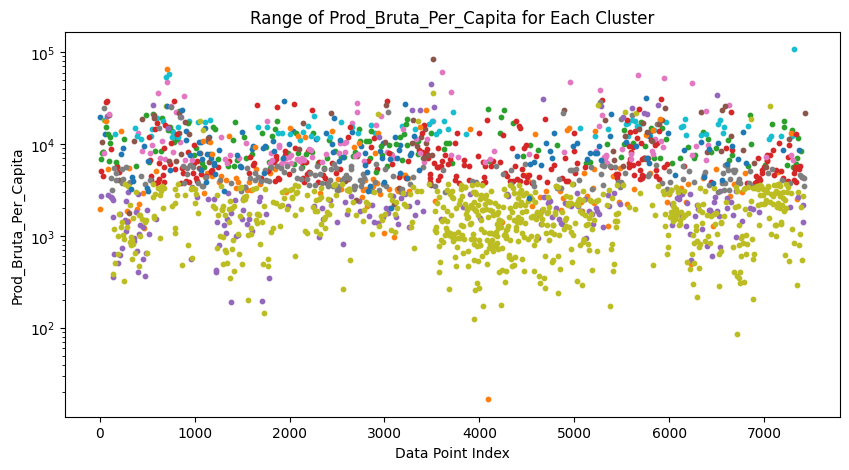

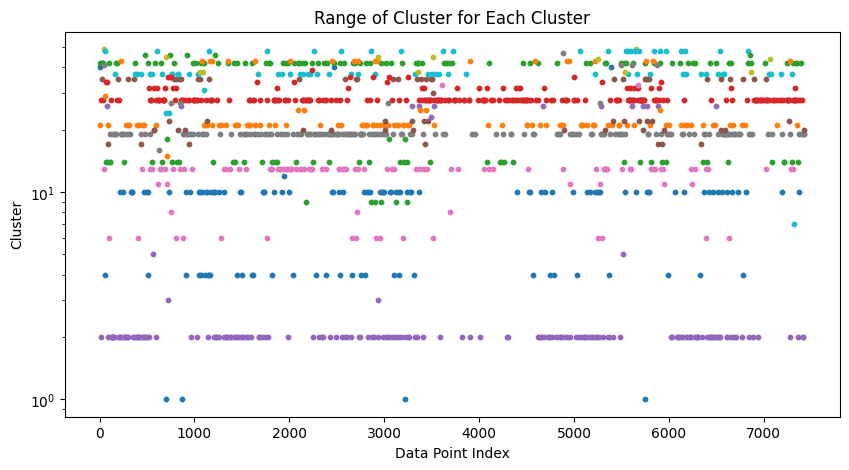

In [ ]:
for feature in features:
  plt.figure(figsize=(10, 5))
  for cluster in datos_cluster['Cluster'].unique():
    cluster_data = datos_cluster[datos_cluster['Cluster'] == cluster]

    plt.scatter(cluster_data.index, cluster_data[feature], label=f'Cluster {cluster}',s=10)
  plt.title(f'Range of {feature} for Each Cluster')
  plt.xlabel('Data Point Index')
  plt.ylabel(feature)
  plt.yscale('log')
  plt.show()


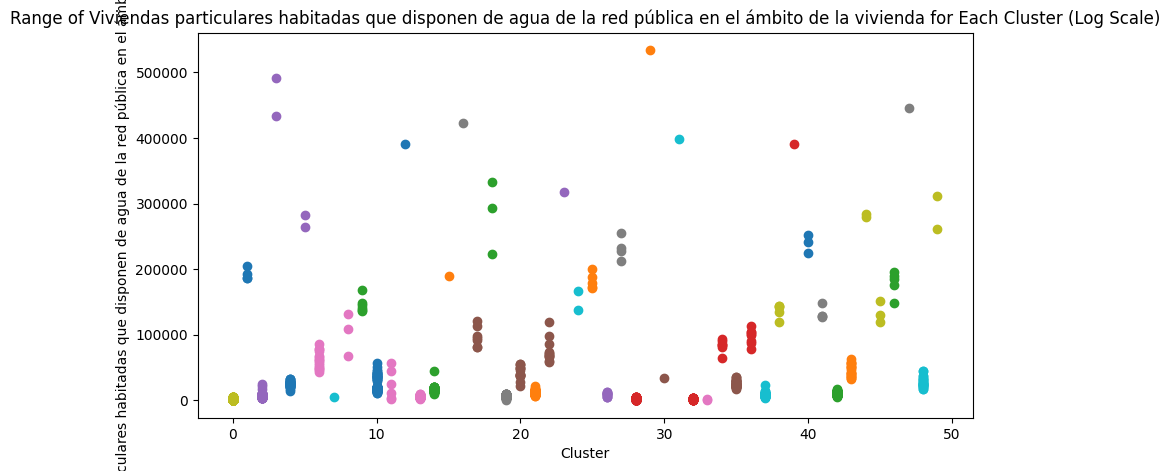

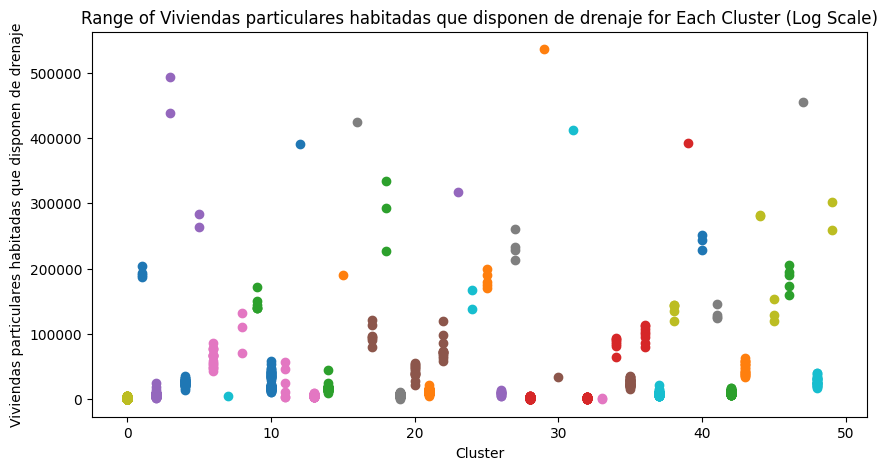

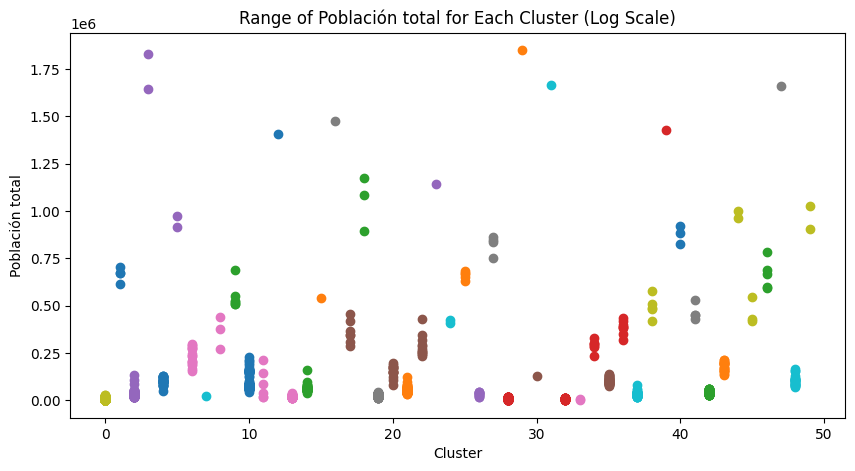

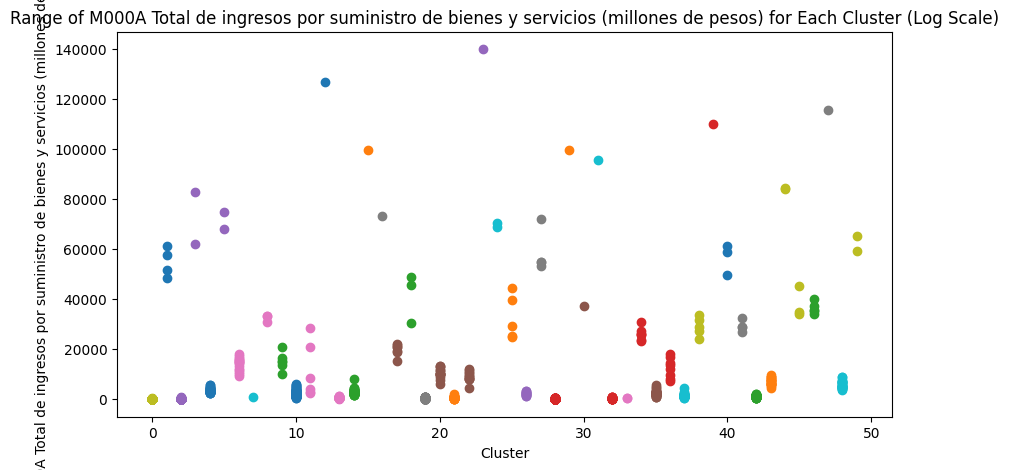

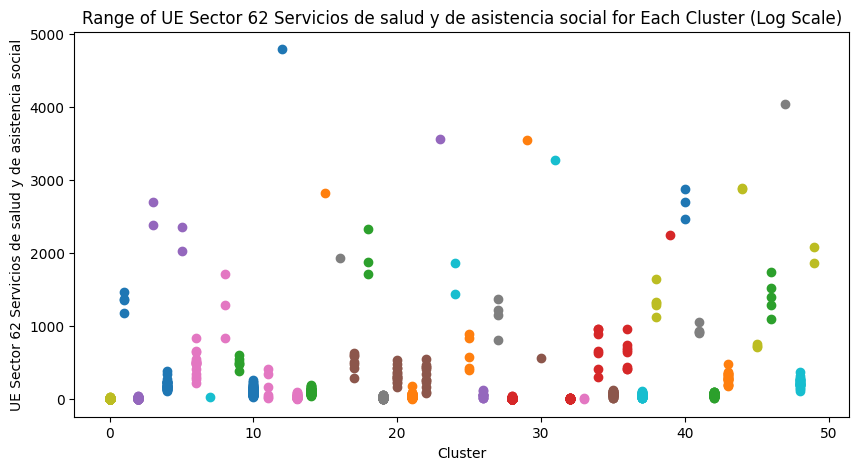

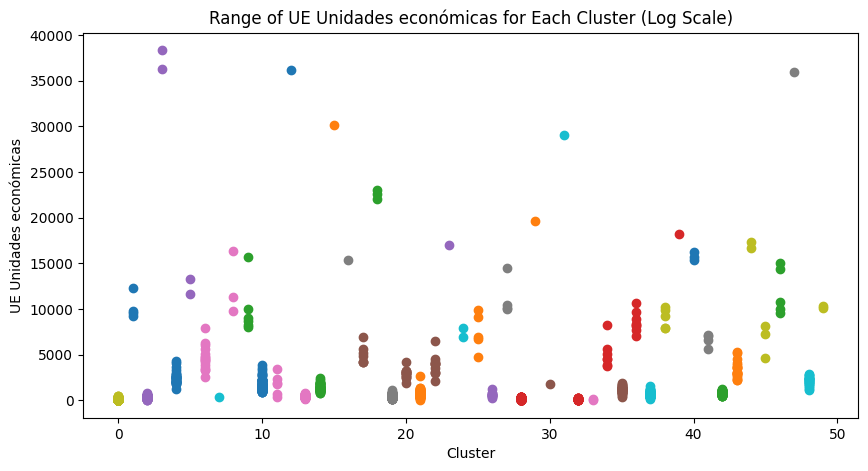

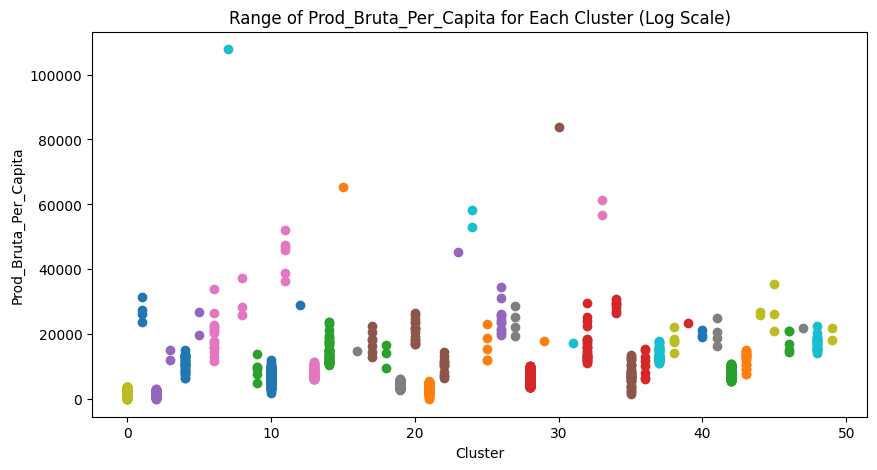

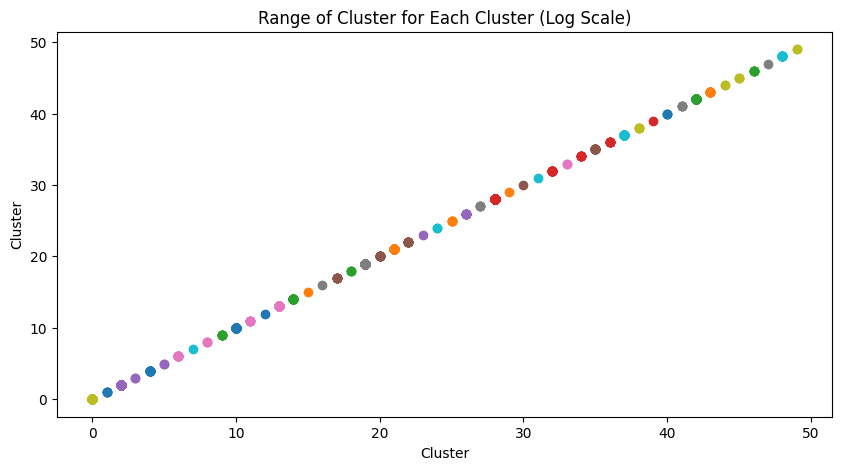

In [ ]:
for feature in features:
  plt.figure(figsize=(10, 5))
  for cluster in datos_cluster['Cluster'].unique():
    cluster_data = datos_cluster[datos_cluster['Cluster'] == cluster]
    plt.scatter(cluster_data['Cluster'], cluster_data[feature], label=f'Cluster {cluster}')
  plt.title(f'Range of {feature} for Each Cluster (Log Scale)')
  plt.xlabel('Cluster')
  plt.ylabel(feature)
  plt.show()


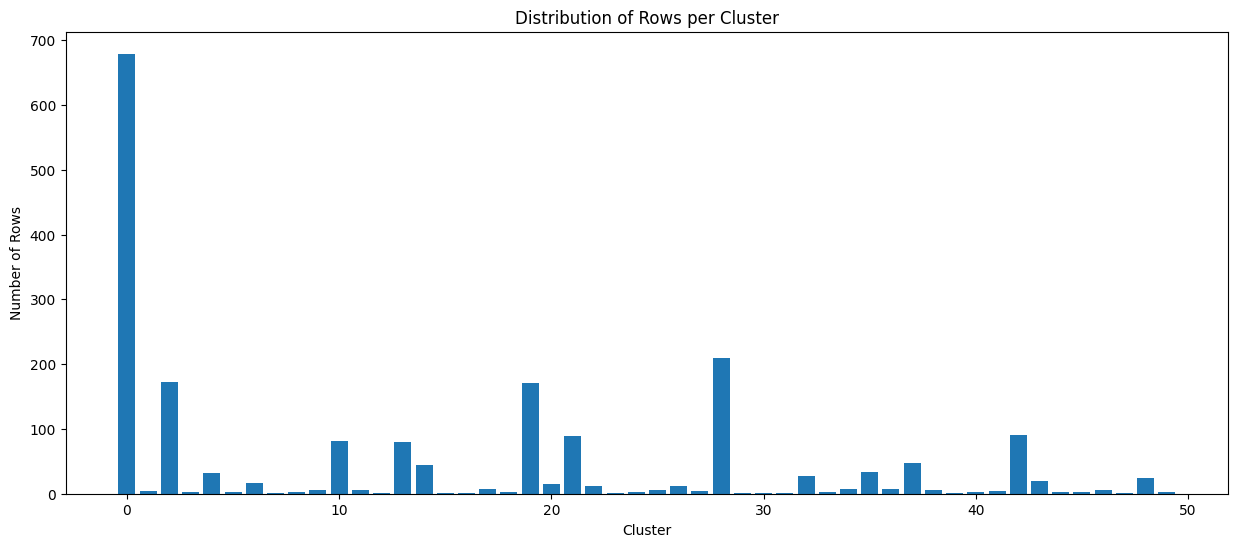

In [ ]:
cluster_counts = datos_cluster.groupby('Cluster')['Cluster'].count()

plt.figure(figsize=(15, 6))
plt.bar(cluster_counts.index, cluster_counts.values)
plt.xlabel('Cluster')
plt.ylabel('Number of Rows')
plt.title('Distribution of Rows per Cluster')
plt.show()


In [ ]:
cluster_counts

,Cluster
Cluster,
0,679
1,4
2,172
3,2
4,32
5,2
6,16
7,1
8,3


In [ ]:
# Perform PCA with 3 components
pca = PCA(n_components=3)
principal_components = pca.fit_transform(X_scaled)

# Add the principal components to your DataFrame
datos_cluster['PC1'] = principal_components[:, 0]
datos_cluster['PC2'] = principal_components[:, 1]
datos_cluster['PC3'] = principal_components[:, 2]

In [ ]:
# Ensure 'Cluster' is of type string for better legend handling
datos_cluster['Cluster'] = datos_cluster['Cluster'].astype(str)

# Create an interactive 3D scatter plot
fig = px.scatter_3d(
    datos_cluster,
    x='PC1',
    y='PC2',
    z='PC3',
    color='Cluster',
    title='Clusters of Entidad-Municipio Combinations in 3D',
    labels={
        'PC1': 'Principal Component 1',
        'PC2': 'Principal Component 2',
        'PC3': 'Principal Component 3',
        'Cluster': 'Cluster'
    },
    hover_name='Municipio',  # Replace with the column you want to display on hover
    opacity=0.8
)

# Update layout for better aesthetics
fig.update_layout(
    legend_title_text='Cluster',
    scene = dict(
        xaxis_title='Principal Component 1',
        yaxis_title='Principal Component 2',
        zaxis_title='Principal Component 3',
    )
)

# Show plot
fig.show()


In [ ]:
# Transpose for better readability
cluster_summary.T


Cluster,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
Viviendas particulares habitadas que disponen de agua de la red pública en el ámbito de la vivienda,1858.247717,192693.800000,6265.679070,4.623403e+05,25188.206250,273282.000000,61519.150000,5624.200000,102864.533333,145958.600000,...,239207.866667,133142.100000,10535.331111,45975.270000,281699.800000,133680.466667,178627.40000,4.459158e+05,27903.291667,286330.900000
Viviendas particulares habitadas que disponen de drenaje,1699.038881,193581.750000,5931.637209,4.655345e+05,25529.856250,274023.100000,63294.875000,5568.400000,104225.133333,147529.600000,...,241305.266667,131235.550000,10521.902222,46955.410000,281500.400000,134306.666667,185063.28000,4.552924e+05,27688.766667,280844.600000
Población total,8213.145214,666452.250000,29645.673256,1.739524e+06,101511.687500,944299.700000,232381.750000,23429.600000,362136.200000,550711.900000,...,875913.133333,465396.800000,42724.322222,177784.900000,981229.600000,464528.466667,665860.92000,1.661709e+06,104797.741667,966538.800000
M000A Total de ingresos por suministro de bienes y servicios (millones de pesos),52.934999,54709.409500,190.139634,7.246162e+04,3590.527625,71222.479500,14023.768250,856.261000,32418.647667,15190.301333,...,56712.006333,29179.907500,1095.957433,7123.795150,84342.301500,38055.970000,36412.06320,1.155469e+05,5799.751250,62141.765500
UE Sector 62 Servicios de salud y de asistencia social,4.798233,1345.250000,14.447674,2.539000e+03,197.812500,2189.000000,485.312500,33.000000,1282.666667,505.666667,...,2680.666667,954.750000,60.544444,295.400000,2886.000000,736.666667,1414.40000,4.042000e+03,228.750000,1976.500000
UE Unidades económicas,106.944035,10232.750000,312.459302,3.734400e+04,2491.531250,12449.500000,4669.125000,393.000000,12466.000000,9930.166667,...,15757.000000,6592.000000,812.422222,3366.300000,17051.500000,6676.333333,11980.40000,3.591900e+04,2127.208333,10213.500000
Prod_Bruta_Per_Capita,1752.909952,27247.213837,1778.599527,1.358666e+04,10998.436538,23220.195311,19645.840864,107794.712671,30512.394729,9336.846383,...,20077.052751,20249.436755,7631.442188,12231.686336,26433.519689,27590.350116,17789.16891,2.182473e+04,17262.582793,20188.772366
Cluster,0.000000,1.000000,2.000000,3.000000e+00,4.000000,5.000000,6.000000,7.000000,8.000000,9.000000,...,40.000000,41.000000,42.000000,43.000000,44.000000,45.000000,46.00000,4.700000e+01,48.000000,49.000000


In [ ]:
datos_cluster = datos_cluster[['Entidad', 'Municipio', 'Cluster']]
datos_cluster

,Entidad,Municipio,Cluster
3,aguascalientes,aguascalientes,11
8,aguascalientes,asientos,15
13,aguascalientes,calvillo,24
18,aguascalientes,cosio,15
23,aguascalientes,el llano,15
...,...,...,...
12219,zacatecas,villa gonzalez ortega,13
12224,zacatecas,villa hidalgo,13
12229,zacatecas,villa de cos,13
12234,zacatecas,villanueva,6


## Exportar

In [ ]:
datos_cluster.to_csv('../Datos/Resultados/Clusters.csv', index=False)

## Por estado

In [ ]:


for entidad, scaled_entidad in scaled_by_entidad.items():
  print(entidad)
  print(len(scaled_entidad))


  kmeans_entidad = KMeans(n_clusters=3, random_state=42)
  dfs_by_entidad[entidad]['Cluster'] = kmeans_entidad.fit_predict(scaled_entidad)

  score = silhouette_score(scaled_entidad, dfs_by_entidad[entidad]['Cluster'])
  print(f'Silhouette Score: {score:.3f}')


aguascalientes
11
Silhouette Score: 0.543
baja california
5
Silhouette Score: 0.257
baja california sur
5
Silhouette Score: 0.567
campeche
10
Silhouette Score: 0.653
chiapas
107
Silhouette Score: 0.760
chihuahua
48
Silhouette Score: 0.655
ciudad de mexico
16
Silhouette Score: 0.362
coahuila de zaragoza
33
Silhouette Score: 0.490
colima
9
Silhouette Score: 0.639
durango
32
Silhouette Score: 0.673
guanajuato
45
Silhouette Score: 0.744
guerrero
74
Silhouette Score: 0.678
hidalgo
74
Silhouette Score: 0.712
jalisco
117
Silhouette Score: 0.894
michoacan de ocampo
109
Silhouette Score: 0.724
morelos
31
Silhouette Score: 0.575
mexico
125
Silhouette Score: 0.708
nayarit
17
Silhouette Score: 0.371
nuevo leon
38
Silhouette Score: 0.690
oaxaca
294
Silhouette Score: 0.800
puebla
178
Silhouette Score: 0.785
queretaro
18
Silhouette Score: 0.507
quintana roo
8
Silhouette Score: 0.440
san luis potosi
48
Silhouette Score: 0.737
sinaloa
17
Silhouette Score: 0.629
sonora
45
Silhouette Score: 0.677
tabasco